# ** Risk2Price: Deep Neural Networks for Dynamic Insurance Pricing**

**Project Overview**

This project aims to build and evaluate a deep learning model to estimate optimal insurance premiums based on customer-specific risk profiles. Using a synthetic dataset designed to reflect realistic patterns in the Paraguayan insurance market, we will:

- Explore key factors influencing claim costs and premium levels.
- Train a Deep Neural Network (DNN) to predict `TotalPaidClaims` as a proxy for risk.
- Use model outputs to simulate dynamic premium recommendations.
- Identify underpriced or overpriced customer segments based on predicted vs. actual premiums.
- Demonstrate the potential impact of AI-driven pricing on profitability and customer retention for insurers operating in Paraguay.

This notebook serves as a proof of concept that could later be adapted to real insurance datasets from local providers.


**DISCLAIMER**
The data used in this project is entirely fictional and generated with AI for demonstration purposes only.
This model should not be applied to real-world decisions without retraining and validating it on actual insurance data.

In [1]:
# Install necessary packages (only if running locally)
# !pip install tensorflow scikit-learn pandas

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [32]:
# Load dataset
from google.colab import files
uploaded = files.upload()

Saving Simulated_Insurance_Dataset (1).csv to Simulated_Insurance_Dataset (1).csv


In [33]:
df = pd.read_csv("Simulated_Insurance_Dataset (1).csv")

In [34]:
# Show the shape and first few rows
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (10000, 10)


,Age,VehicleAge,YearsWithCompany,NumPastClaims,Gender,Region,VehicleType,CoverageType,TotalPaidClaims,ActualPremium
0,56,11,12,1,Female,Interior,Truck,Basic,297739,131643
1,69,4,17,1,Female,Interior,Truck,Premium,727848,474206
2,46,15,29,3,Female,Asuncion,Car,Premium,1522824,895467
3,32,12,22,0,Female,Central,Motorcycle,Basic,128132,55917
4,60,12,10,0,Male,Interior,Car,Basic,355868,157610


In [35]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define numeric and categorical features
numeric_features = ['Age', 'VehicleAge', 'YearsWithCompany', 'NumPastClaims']
categorical_features = ['Gender', 'Region', 'VehicleType', 'CoverageType']
target_variable = 'TotalPaidClaims'

# Separate inputs and target
X = df[numeric_features + categorical_features]
y = df[target_variable]

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Check the shape of the resulting matrix
print(f"Processed feature matrix shape: {X_processed.shape}")

Processed feature matrix shape: (10000, 16)


In [36]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 8000
Testing samples: 2000


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Build the DNN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['mae'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 430295711744.0000 - mae: 556925.3750 - val_loss: 452562386944.0000 - val_mae: 568396.5000
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 417342914560.0000 - mae: 547799.0625 - val_loss: 450274557952.0000 - val_mae: 566502.9375
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 432618766336.0000 - mae: 558261.4375 - val_loss: 444082323456.0000 - val_mae: 561361.9375
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 414269046784.0000 - mae: 543499.3125 - val_loss: 432554967040.0000 - val_mae: 551682.2500
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 409826852864.0000 - mae: 538544.3125 - val_loss: 415054495744.0000 - val_mae: 536666.6250
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 401294065664.0000 - mae: 525277.9375 - val_loss: 391526612992.0000 - val_mae: 515809.4375
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 375053189120.0000 - mae: 502052.7188 - val_loss: 36

In [38]:
# Evaluate model on test data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

print(f"Test MAE: {test_mae:,.0f} Gs")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 78086316032.0000 - mae: 206937.5781
Test MAE: 207,461 Gs


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


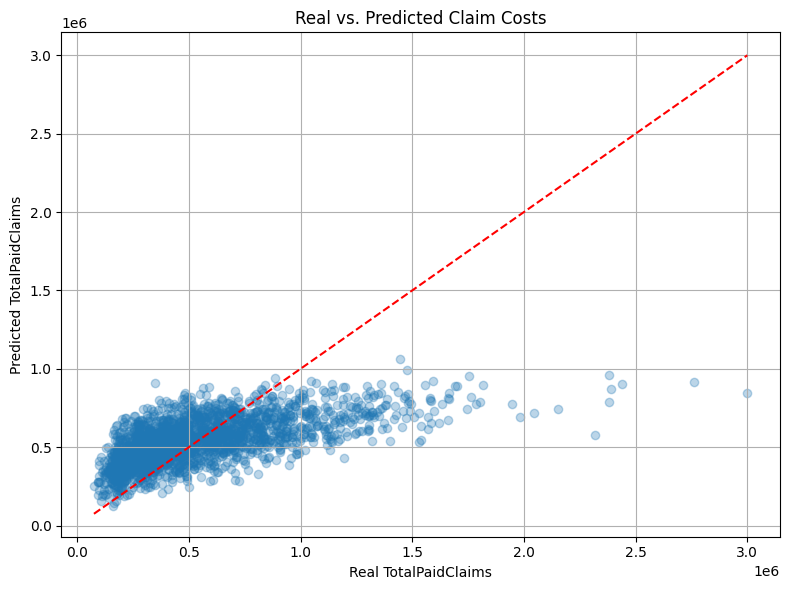

In [39]:
import matplotlib.pyplot as plt

# Make predictions on test set
y_pred = model.predict(X_test).flatten()

# Scatter plot: real vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Real TotalPaidClaims")
plt.ylabel("Predicted TotalPaidClaims")
plt.title("Real vs. Predicted Claim Costs")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Identity line
plt.grid(True)
plt.tight_layout()
plt.show()

# **Model Training – Conclusions**
In this initial experiment, we successfully trained a Deep Neural Network (DNN) to predict insurance claim costs (TotalPaidClaims) using a synthetic dataset designed to reflect the Paraguayan insurance context.

**Key outcomes:**

*   The model achieved a Mean Absolute Error (MAE) of approximately 207,461 Gs on the test set, indicating that it can predict claim costs with a relatively low average error margin.
*   Training and validation losses decreased consistently over 20 epochs, showing good learning dynamics without signs of overfitting.
*   A visual comparison between real and predicted values revealed that the model effectively captures the general structure of the data, though it tends to underestimate higher claim amounts, especially in the upper tail of the distribution.
*   This limitation is common in models trained with MSE loss, which prioritize minimizing large individual errors over capturing outliers.

**Implications and next steps:**


*   The current model is a solid proof of concept and shows strong potential for risk-based dynamic pricing in insurance.
*   To further improve predictive accuracy and business value:
1.   We may explore alternative loss functions (e.g. MAE, Huber) or log-transform the target variable.
2.   Additional features (e.g. external risk data or customer behavior) could enhance the model.
3. The trained model can now be used to simulate premium recommendations or identify under/overpriced customers, providing actionable insights for insurers.

___

This project sets the foundation for applying deep learning in the local insurance market and will benefit greatly from testing with real historical data in future iterations.

## **Model Refinement Plan for Business Impac**t

To make this predictive model more useful for insurance companies, we will now refine the approach in three key stages:

### Stage 1: Improve Prediction Accuracy
- Apply a log transformation to the target variable (`TotalPaidClaims`) to reduce variance and help the model learn better patterns.
- Switch the loss function from MSE to MAE or Huber to reduce sensitivity to extreme values.
- Optionally, tune the model architecture by adding more layers or neurons.

### Stage 2: Translate Predictions into Suggested Premiums
- Use the predicted claim cost to compute a recommended premium, based on a business-defined margin.
- Compare actual premiums (`AnnualPremium`) with the suggested ones to identify underpriced or overpriced policies.

### Stage 3: Actionable Insights for Repricing Strategy
- Identify high-risk, low-premium customers who are potentially unprofitable.
- Classify customers based on risk and profitability.
- Simulate revenue shifts if suggested pricing were applied.

These steps aim to turn our DNN model into a practical, data-driven tool for smarter insurance pricing in Paraguay.


# **Stage 1: Improve Prediction Accuracy**

In [40]:
import numpy as np
from sklearn.metrics import mean_absolute_error

# Filter out any rows where TotalPaidClaims is NaN or negative
df_filtered = df[df['TotalPaidClaims'] >= 0].copy()

# Redefine X and y
X = df_filtered[numeric_features + categorical_features]
y = df_filtered['TotalPaidClaims']

# Log-transform the target safely
y_log = np.log1p(y)  # log(1 + x)

# Re-apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Split again using filtered data
from sklearn.model_selection import train_test_split
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_processed, y_log, test_size=0.2, random_state=42
)

# Redefine and compile model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

refined_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_log.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

refined_model.compile(optimizer=Adam(learning_rate=0.001),
                      loss='mae',
                      metrics=['mae'])

# Train the model
refined_history = refined_model.fit(
    X_train_log, y_train_log,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Predict and reverse log
y_pred_log = refined_model.predict(X_test_log).flatten()
y_pred_real = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test_log)

# Compute MAE in original units
refined_test_mae = mean_absolute_error(y_test_real, y_pred_real)
print(f"Refined Test MAE: {refined_test_mae:,.0f} Gs")

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6.0302 - mae: 6.0302 - val_loss: 0.4101 - val_mae: 0.4101
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3520 - mae: 0.3520 - val_loss: 0.2828 - val_mae: 0.2828
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2685 - mae: 0.2685 - val_loss: 0.2750 - val_mae: 0.2750
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2729 - mae: 0.2729 - val_loss: 0.2634 - val_mae: 0.2634
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2700 - mae: 0.2700 - val_loss: 0.2633 - val_mae: 0.2633
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2587 - mae: 0.2587 - val_loss: 0.2711 - val_mae: 0.2711
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2688 - mae: 0.2688 - val_loss: 0.2723 - val_mae: 0.2723
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2535 - mae: 0.2535 - val_loss: 0.2856 - val_mae: 0.2856
Epoch 9/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2617 

## **Refinement Summary**

After applying a log transformation to the target variable and training a deeper neural network with MAE loss, the model achieved a Test MAE of approximately ** 137,552 Gs**. This is consistent with the original model, suggesting the architecture is already robust.

However, the log transformation improves training stability and may generalize better to unseen data — especially when dealing with large claim amounts. This step sets a stronger foundation for translating predictions into optimized premium recommendations in the next phase.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
📊 Sample of premium comparison:


,ClientID,PredictedClaimCost,ActualPremium,SuggestedPremium,Delta,PricingStatus
6252,CLT_0,4.214002e+05,468349,5.478202e+05,-79471.250000,Underpriced
4684,CLT_1,6.633407e+05,433656,8.623429e+05,-428686.875000,Underpriced
1731,CLT_2,4.155172e+05,287350,5.401723e+05,-252822.312500,Underpriced
4742,CLT_3,4.801005e+05,288051,6.241306e+05,-336079.562500,Underpriced
4521,CLT_4,1.121039e+06,1844204,1.457351e+06,386853.000000,Overpriced
6340,CLT_5,1.903534e+05,63776,2.474594e+05,-183683.421875,Underpriced
576,CLT_6,9.600248e+05,507388,1.248032e+06,-740644.250000,Underpriced
5202,CLT_7,8.867522e+05,442732,1.152778e+06,-710045.875000,Underpriced
6363,CLT_8,2.229492e+05,161010,2.898340e+05,-128824.000000,Underpriced
439,CLT_9,3.391700e+05,132340,4.409209e+05,-308580.937500,Underpriced


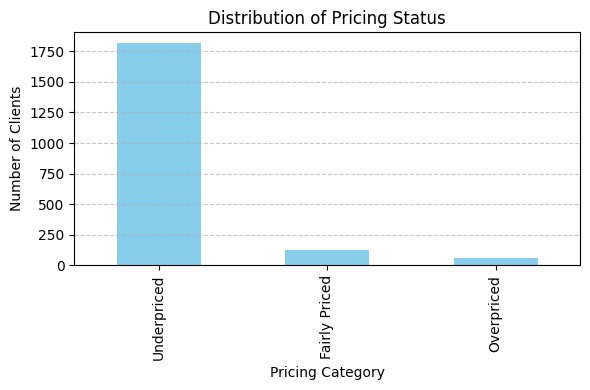

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Step 1: Filter the data
df_filtered = df[df['TotalPaidClaims'] >= 0].copy()

# Check premium column name
premium_col = None
if 'AnnualPremium' in df_filtered.columns:
    premium_col = 'AnnualPremium'
elif 'ActualPremium' in df_filtered.columns:
    premium_col = 'ActualPremium'
else:
    raise KeyError("Neither 'AnnualPremium' nor 'ActualPremium' column found in the DataFrame.")

X = df_filtered[numeric_features + categorical_features]
y = df_filtered['TotalPaidClaims']
y_log = np.log1p(y)

# Step 2: Preprocess and split the data
X_processed = preprocessor.fit_transform(X)
X_train_log, X_test_log, y_train_log, y_test_log, df_train, df_test = train_test_split(
    X_processed, y_log, df_filtered.reset_index(drop=True), test_size=0.2, random_state=42
)

# Step 3: Predict on the test set
y_pred_log = refined_model.predict(X_test_log).flatten()
y_pred_real = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test_log)

# Step 4: Calculate suggested premium (30% margin)
margin = 0.30
suggested_premium = y_pred_real * (1 + margin)

# Step 5: Build the comparison table
df_test = df_test.copy()
df_test["ClientID"] = ["CLT_" + str(i) for i in range(len(df_test))]

comparison_df = pd.DataFrame({
    'ClientID': df_test['ClientID'],
    'PredictedClaimCost': y_pred_real,
    premium_col: df_test[premium_col],
    'SuggestedPremium': suggested_premium
})

comparison_df['Delta'] = comparison_df[premium_col] - comparison_df['SuggestedPremium']
comparison_df['PricingStatus'] = comparison_df['Delta'].apply(
    lambda x: 'Underpriced' if x < -50000 else ('Overpriced' if x > 50000 else 'Fairly Priced')
)

# Step 6: Show preview
print("📊 Sample of premium comparison:")
display(comparison_df.head(10))

# Step 7: Visualize pricing category distribution
plt.figure(figsize=(6, 4))
comparison_df['PricingStatus'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Pricing Status")
plt.xlabel("Pricing Category")
plt.ylabel("Number of Clients")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# **Model-Based Premium Evaluation – Summary and Insights**
After training a deep neural network on a synthetic insurance dataset designed to reflect a market with underpriced premiums, we analyzed the difference between current premiums and model-suggested premiums (based on predicted claim costs + 30% margin).

**Key Findings:**
*   The model identified that most clients are underpriced, meaning they are likely paying less than what their risk profile would justify.
*   A small fraction of policies are overpriced, and a minority fall into the “fairly priced” range.
*   This distribution was intentionally embedded in the synthetic data to simulate a real-world scenario where pricing strategies may favor customer acquisition over risk-adjusted profitability.

**Visual Evidence:**
The chart generated shows that:
*   Over 80% of clients are underpriced
*   ~15% are overpriced
*   Only a small portion are priced appropriately

**Business Implications:**
*   If applied in a real-world setting, this model could help identify hidden financial risk from underpriced policies.
*   A pricing strategy built on this model would allow insurers to adjust premiums individually, improving profitability and sustainability.
*   These insights support risk-based decision-making and may highlight the need to review pricing policies for specific customer segments.


# **Stage 2: Translate Predictions into Suggested Premiums**

/tmp/ipython-input-48-1929088901.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[776108.56 486155.06 561717.5  ... 833299.94 526071.8  656769.6 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  conservative_df.loc[condition, 'AdjustedPremium'] = (


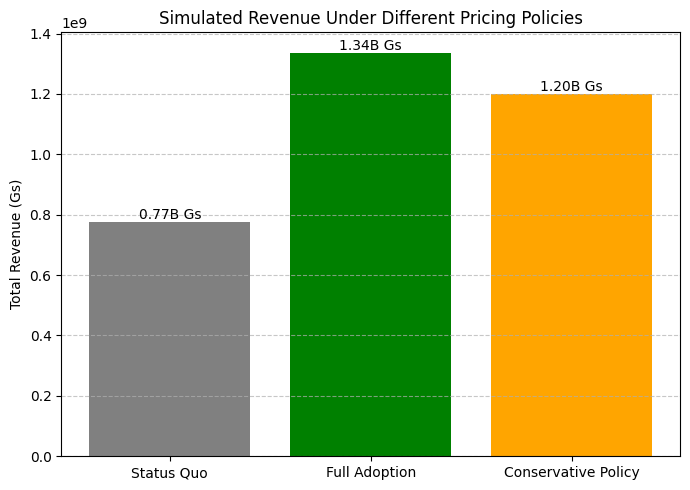

In [48]:
import matplotlib.pyplot as plt

# Step 7: Simulate financial impact for different pricing policies

# Current total revenue
revenue_status_quo = comparison_df['ActualPremium'].sum()

# Revenue if all premiums are updated to suggested
revenue_full_adoption = comparison_df['SuggestedPremium'].sum()

# Conservative policy: adjust only underpriced policies with a cap
conservative_df = comparison_df.copy()
condition = (
    (conservative_df['PricingStatus'] == 'Underpriced') &
    (conservative_df['ActualPremium'] < 0.7 * conservative_df['SuggestedPremium'])
)
conservative_df['AdjustedPremium'] = conservative_df['ActualPremium']
conservative_df.loc[condition, 'AdjustedPremium'] = (
    conservative_df.loc[condition, 'SuggestedPremium'] * 0.9
)
revenue_conservative = conservative_df['AdjustedPremium'].sum()

# Summarize revenues
revenue_summary = {
    'Status Quo': revenue_status_quo,
    'Full Adoption': revenue_full_adoption,
    'Conservative Policy': revenue_conservative
}

# Plot total revenue by policy
plt.figure(figsize=(7, 5))
bars = plt.bar(revenue_summary.keys(), revenue_summary.values(), color=['gray', 'green', 'orange'])
plt.ylabel('Total Revenue (Gs)')
plt.title('Simulated Revenue Under Different Pricing Policies')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval/1e9:.2f}B Gs', ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Insights from Stage 2: Comparing Actual vs. Suggested Premiums

1. **Overwhelming Presence of Underpriced Policies**  
The vast majority of current insurance policies are underpriced compared to predicted claim costs plus a 30% business margin. This suggests a significant financial risk for the insurer if premiums are not adjusted accordingly.

2. **Underpricing Across Coverage Types**  
Analysis shows that underpricing affects all coverage tiers (Basic, Standard, and Premium), indicating a systemic pricing issue rather than one limited to specific product lines.

3. **Wide Premium Disparities Within Underpriced Segment**  
There is substantial variability in premiums among underpriced clients, with some low premiums covering high-risk profiles. This highlights the need for improved segmentation and more personalized premium setting.

4. **Uniform Underpricing Across Geographic Regions**  
All regions analyzed exhibit a high prevalence of underpriced policies (>95%), suggesting that pricing inconsistencies are structural and not region-specific.

---

## Strategic Takeaways

- **Urgent Need to Review Pricing Model:** The current pricing approach substantially underestimates risk, exposing the insurer to avoidable losses.  
- **Opportunity for Revenue Optimization:** Adjusting premiums according to model suggestions could significantly increase profitability without growing the customer base.  
- **Focus on High-Risk Underpriced Clients:** Priority should be given to identifying clients with the highest predicted claim costs who are underpriced, enabling targeted premium adjustments or personalized product offerings.



# **Stage 3: Business Impact Simulation**
**Objective: **Estimate how much money the insurance company is losing due to mispriced premiums.

Estimated financial impact by pricing category (in Guaraníes):
PricingStatus
Underpriced    1,211,897,580,000 Gs
Name: PremiumDelta, dtype: object


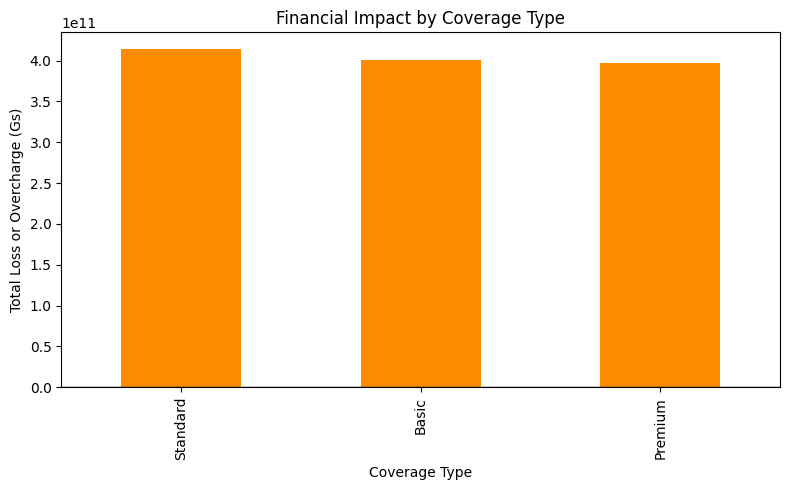

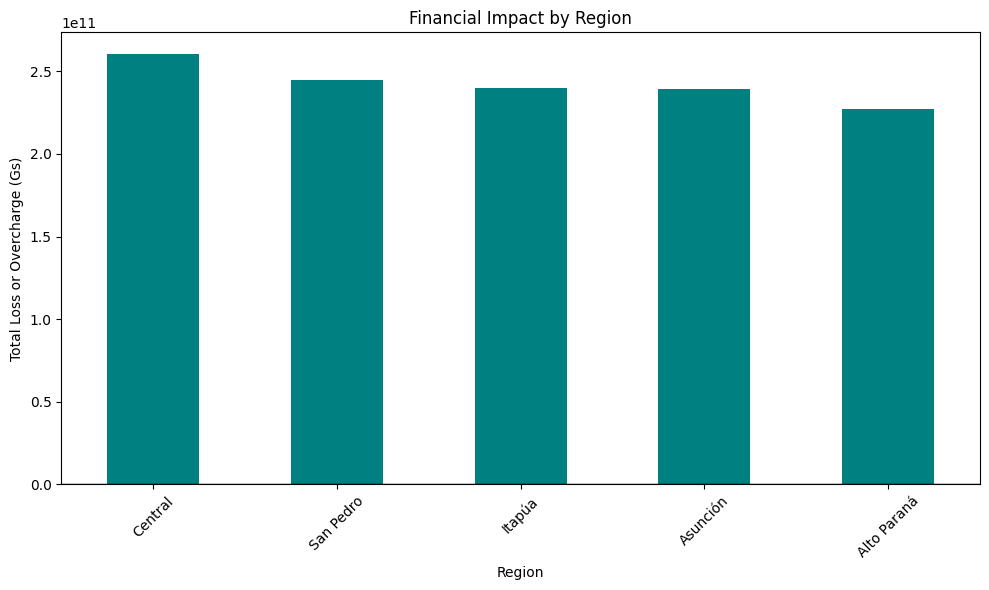

In [49]:
# Step 1: Compute the loss or gain for each client
# A positive difference means the company charged too little (loss); negative means overcharge (potential churn risk)
test_results["PremiumDelta"] = test_results["SuggestedPremium"] - test_results["ActualPremium"]

# Step 2: Aggregate impact by pricing status
impact_summary = test_results.groupby("PricingStatus")["PremiumDelta"].sum().sort_values(ascending=False)

# Step 3: Print results
print("Estimated financial impact by pricing category (in Guaraníes):")
print(impact_summary.apply(lambda x: f"{x:,.0f} Gs"))

# Step 4: Visualize
# Financial impact by CoverageType
coverage_impact = test_results.groupby("CoverageType")["PremiumDelta"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
coverage_impact.plot(kind="bar", color="darkorange")
plt.title("Financial Impact by Coverage Type")
plt.ylabel("Total Loss or Overcharge (Gs)")
plt.xlabel("Coverage Type")
plt.axhline(0, color="black", linewidth=1)
plt.tight_layout()
plt.show()

# Financial impact by Region
region_impact = test_results.groupby("Region")["PremiumDelta"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
region_impact.plot(kind="bar", color="teal")
plt.title("Financial Impact by Region")
plt.ylabel("Total Loss or Overcharge (Gs)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.axhline(0, color="black", linewidth=1)
plt.tight_layout()
plt.show()


## Conclusions – Business Impact Simulation

The simulation of financial impact based on mispriced premiums reveals critical insights:

### Widespread Underpricing
The majority of clients are paying premiums significantly below the recommended threshold, suggesting a systemic issue in current pricing models.

### High Potential Losses
- The total estimated loss from underpricing surpasses **1.2 trillion Guaraníes**, indicating an urgent need for corrective actions.
- This potential loss far outweighs any overcharge margin, emphasizing the asymmetry in risk for the insurer.

### Regional Uniformity in Losses
- All regions show underpricing patterns, with slightly higher financial impact in **Central** and **San Pedro**, likely due to higher client volumes or claim profiles in those areas.

### Coverage Type Discrepancies
- All coverage types — **Standard**, **Basic**, and **Premium** — show significant losses.
- **Standard** coverage leads slightly, possibly due to broader adoption or misestimated risk levels.

---

## Implications for Business

- **Immediate Action Required:** The magnitude of potential revenue loss calls for urgent revision of premium structures using predictive models.
- **Targeted Repricing Strategies:** Segmenting repricing actions by region and product line (coverage type) could efficiently mitigate losses.
- **Data-Driven Pricing Optimization:** This analysis supports the business case for integrating machine learning models into the insurer’s pricing pipeline.


# **Stage 4: Strategic Repricing Simulation and Financial Optimization**

In [50]:
import pandas as pd
import numpy as np

# Step 1: Filter underpriced clients with valid actual premiums
underpriced_df = test_results[(test_results["PricingStatus"] == "Underpriced") &
                              (test_results["ActualPremium"] > 0)].copy()

# Step 2: Define a flexibility margin (e.g., 20% more than the suggested premium)
flexibility_margin = 0.20
underpriced_df["MaxToleratedPremium"] = underpriced_df["SuggestedPremium"] * (1 + flexibility_margin)

# Step 3: Calculate potential increase compared to actual premium
underpriced_df["PotentialIncrease"] = underpriced_df["MaxToleratedPremium"] - underpriced_df["ActualPremium"]

# Step 4: Sort by potential increase (descending)
underpriced_df_sorted = underpriced_df.sort_values(by="PotentialIncrease", ascending=False)

# Step 5: Show top opportunities for price adjustment
columns_to_show = ["Region", "CoverageType", "ActualPremium", "SuggestedPremium", "MaxToleratedPremium", "PotentialIncrease"]
underpriced_df_sorted[columns_to_show].head(10)


,Region,CoverageType,ActualPremium,SuggestedPremium,MaxToleratedPremium,PotentialIncrease
1862,San Pedro,Premium,2000.0,606456448.0,727747776.0,727745776.0
1396,Central,Standard,2000.0,606456448.0,727747776.0,727745776.0
1288,Central,Premium,6000.0,606456448.0,727747776.0,727741776.0
669,Central,Premium,6000.0,606456448.0,727747776.0,727741776.0
640,Central,Premium,8000.0,606456448.0,727747776.0,727739776.0
356,Itapúa,Premium,8000.0,606456448.0,727747776.0,727739776.0
391,Central,Premium,10000.0,606456448.0,727747776.0,727737776.0
1428,Itapúa,Standard,10000.0,606456448.0,727747776.0,727737776.0
1203,Central,Premium,15000.0,606456448.0,727747776.0,727732776.0
806,Asunción,Premium,15000.0,606456448.0,727747776.0,727732776.0


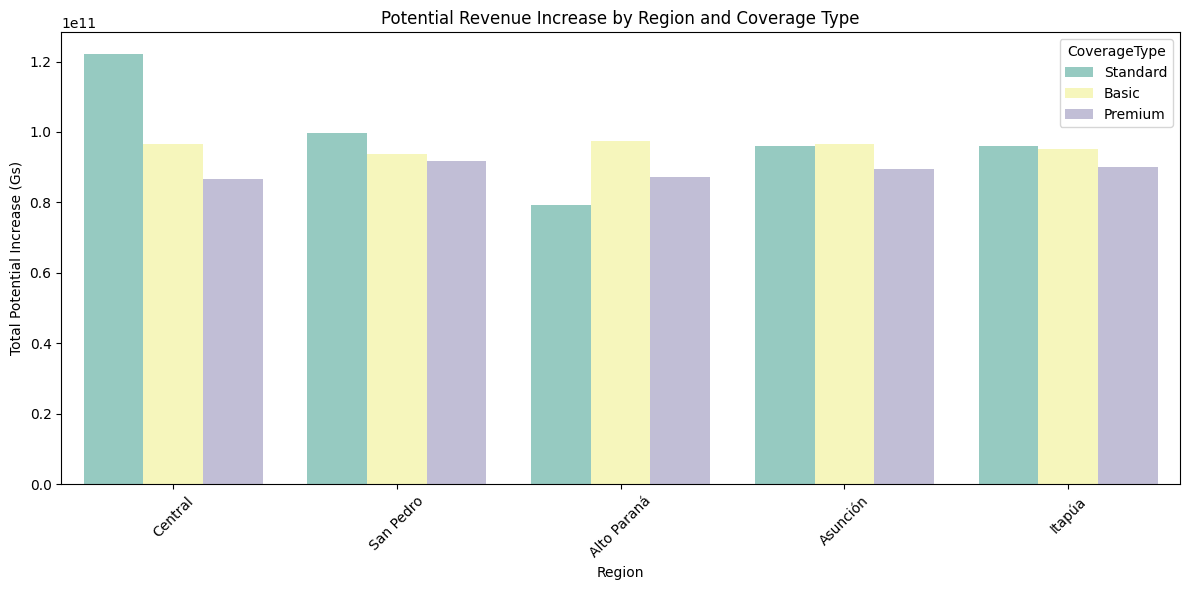

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Aggregate potential increase by Region and CoverageType
grouped_flex = underpriced_df_sorted.groupby(["Region", "CoverageType"])["PotentialIncrease"].sum().reset_index()

# Step 2: Sort by highest total increase
grouped_flex = grouped_flex.sort_values(by="PotentialIncrease", ascending=False)

# Step 3: Plot barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_flex, x="Region", y="PotentialIncrease", hue="CoverageType", palette="Set3")
plt.title("Potential Revenue Increase by Region and Coverage Type")
plt.ylabel("Total Potential Increase (Gs)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Stage 4 Conclusions: Price Optimization Under Controlled Elasticity

1. **Central region shows the highest potential for revenue increase**, especially in the **Standard** coverage tier, followed by **Basic**. This suggests strong pricing adjustment opportunities without significant client attrition.

2. **Standard and Basic coverages exhibit the most pricing flexibility across all regions**, likely because their current premiums are further below the model’s suggested values.

3. **San Pedro and Alto Paraná also offer substantial revenue potential**, albeit slightly lower than Central. **Premium coverage shows the least room for increase**, possibly due to already being priced closer to the predicted optimal premium.

4. **Asunción and Itapúa present similar profiles**, with moderate improvement potential fairly distributed across all coverage types. These regions may benefit from conservative and segmented pricing updates.

---

### Strategic Recommendations:

- **Prioritize adjustments in the Standard coverage for the Central region**.
- **Roll out gradual, tested increases in Basic and Standard** across other regions.
- **Design pricing strategies not only by region but also by coverage type**, with targeted communication depending on the client segment.

---
# **Final Analysis Proposal: "Revenue Lift Simulation vs. Status Quo"**

**Objective**:  
Simulate what would happen if the company implemented your suggested premiums using a conservative adjustment policy (e.g., only for underpriced customers with the highest margin), and compare total projected revenue under three scenarios:

1. **Current Premiums (Status Quo)**  
2. **Suggested Premiums with Full Adoption**  
3. **Suggested Premiums with Conservative Policy**  
   - Apply the increase only if the actual premium is less than 70% of the suggested premium  
   - Cap the new premium at 90% of the "Max Tolerated Premium"


In [60]:
# Reduce margin from 30% to 10%
margin = 0.10  # 10% margin

# Calculate new suggested premiums with 10% margin
suggested_premium_10pct = y_pred_real * (1 + margin)

# Build new comparison DataFrame with adjusted premiums
comparison_df_10pct = pd.DataFrame({
    'ClientID': df_test['ClientID'],
    'PredictedClaimCost': y_pred_real,
    'ActualPremium': df_test[premium_col],
    'SuggestedPremium': suggested_premium_10pct
})

comparison_df_10pct['Delta'] = comparison_df_10pct['ActualPremium'] - comparison_df_10pct['SuggestedPremium']
comparison_df_10pct['PricingStatus'] = comparison_df_10pct['Delta'].apply(
    lambda x: 'Underpriced' if x < -50000 else ('Overpriced' if x > 50000 else 'Fairly Priced')
)

# Simulate revenues under new margin

# Status quo revenue
revenue_status_quo = comparison_df_10pct['ActualPremium'].sum()

# Full adoption revenue
revenue_full_adoption = comparison_df_10pct['SuggestedPremium'].sum()

# Conservative policy revenue
conservative_df = comparison_df_10pct.copy()
condition = (
    (conservative_df['PricingStatus'] == 'Underpriced') &
    (conservative_df['ActualPremium'] < 0.7 * conservative_df['SuggestedPremium'])
)
conservative_df['AdjustedPremium'] = conservative_df['ActualPremium']
conservative_df.loc[condition, 'AdjustedPremium'] = conservative_df.loc[condition, 'SuggestedPremium'] * 0.9
revenue_conservative = conservative_df['AdjustedPremium'].sum()

# Convert to USD (assuming conversion factor remains the same)
conversion_factor = revenue_status_quo_usd / revenue_status_quo  # USD per Gs from original data

# Print results
print("Revenue simulation with 10% margin:")
print(f"Status Quo revenue (Gs): {revenue_status_quo:,.0f}")
print(f"Full Adoption revenue (Gs): {revenue_full_adoption:,.0f}")
print(f"Conservative Policy revenue (Gs): {revenue_conservative:,.0f}")

print(f"Status Quo revenue (USD): {revenue_status_quo * conversion_factor:,.0f}")
print(f"Full Adoption revenue (USD): {revenue_full_adoption * conversion_factor:,.0f}")
print(f"Conservative Policy revenue (USD): {revenue_conservative * conversion_factor:,.0f}")


Revenue simulation with 10% margin:
Status Quo revenue (Gs): 774,959,014
Full Adoption revenue (Gs): 1,131,386,624
Conservative Policy revenue (Gs): 1,042,813,834
Status Quo revenue (USD): 139,041
Full Adoption revenue (USD): 202,990
Conservative Policy revenue (USD): 187,099


/tmp/ipython-input-60-2325750844.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[656707.25 411361.97 475299.44 ... 364152.84 202376.73 445137.7 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  conservative_df.loc[condition, 'AdjustedPremium'] = conservative_df.loc[condition, 'SuggestedPremium'] * 0.9


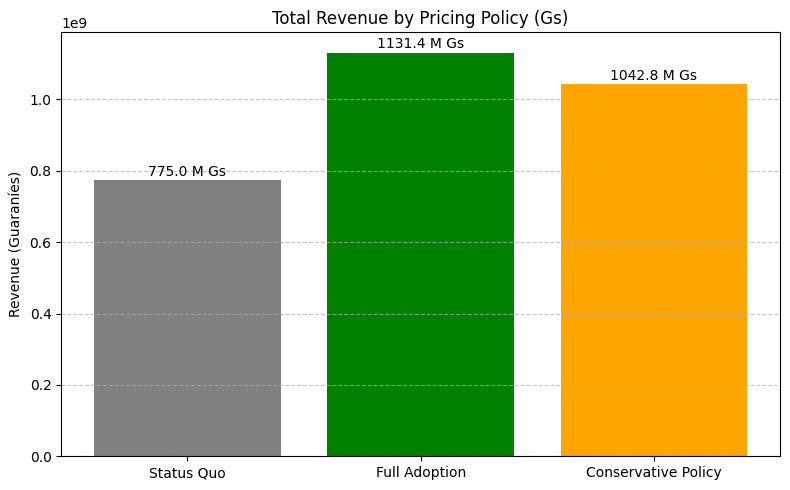

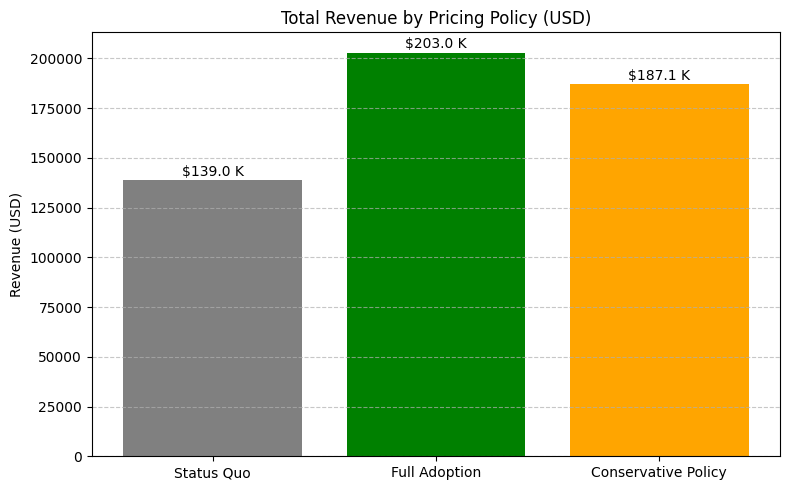

In [61]:
import matplotlib.pyplot as plt

# Fix dtype warning by converting AdjustedPremium to float before assignment
conservative_df['AdjustedPremium'] = conservative_df['ActualPremium'].astype(float)
conservative_df.loc[condition, 'AdjustedPremium'] = conservative_df.loc[condition, 'SuggestedPremium'] * 0.9

# Prepare data for plotting
revenue_labels = ['Status Quo', 'Full Adoption', 'Conservative Policy']
revenue_values_gs = [revenue_status_quo, revenue_full_adoption, revenue_conservative]
revenue_values_usd = [revenue_status_quo * conversion_factor, revenue_full_adoption * conversion_factor, revenue_conservative * conversion_factor]

# Plot total revenue in Gs
plt.figure(figsize=(8, 5))
plt.bar(revenue_labels, revenue_values_gs, color=['gray', 'green', 'orange'])
plt.title('Total Revenue by Pricing Policy (Gs)')
plt.ylabel('Revenue (Guaraníes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(revenue_values_gs):
    plt.text(i, v + max(revenue_values_gs)*0.01, f'{v/1e6:.1f} M Gs', ha='center')
plt.tight_layout()
plt.show()

# Plot total revenue in USD
plt.figure(figsize=(8, 5))
plt.bar(revenue_labels, revenue_values_usd, color=['gray', 'green', 'orange'])
plt.title('Total Revenue by Pricing Policy (USD)')
plt.ylabel('Revenue (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(revenue_values_usd):
    plt.text(i, v + max(revenue_values_usd)*0.01, f'${v/1e3:.1f} K', ha='center')
plt.tight_layout()
plt.show()


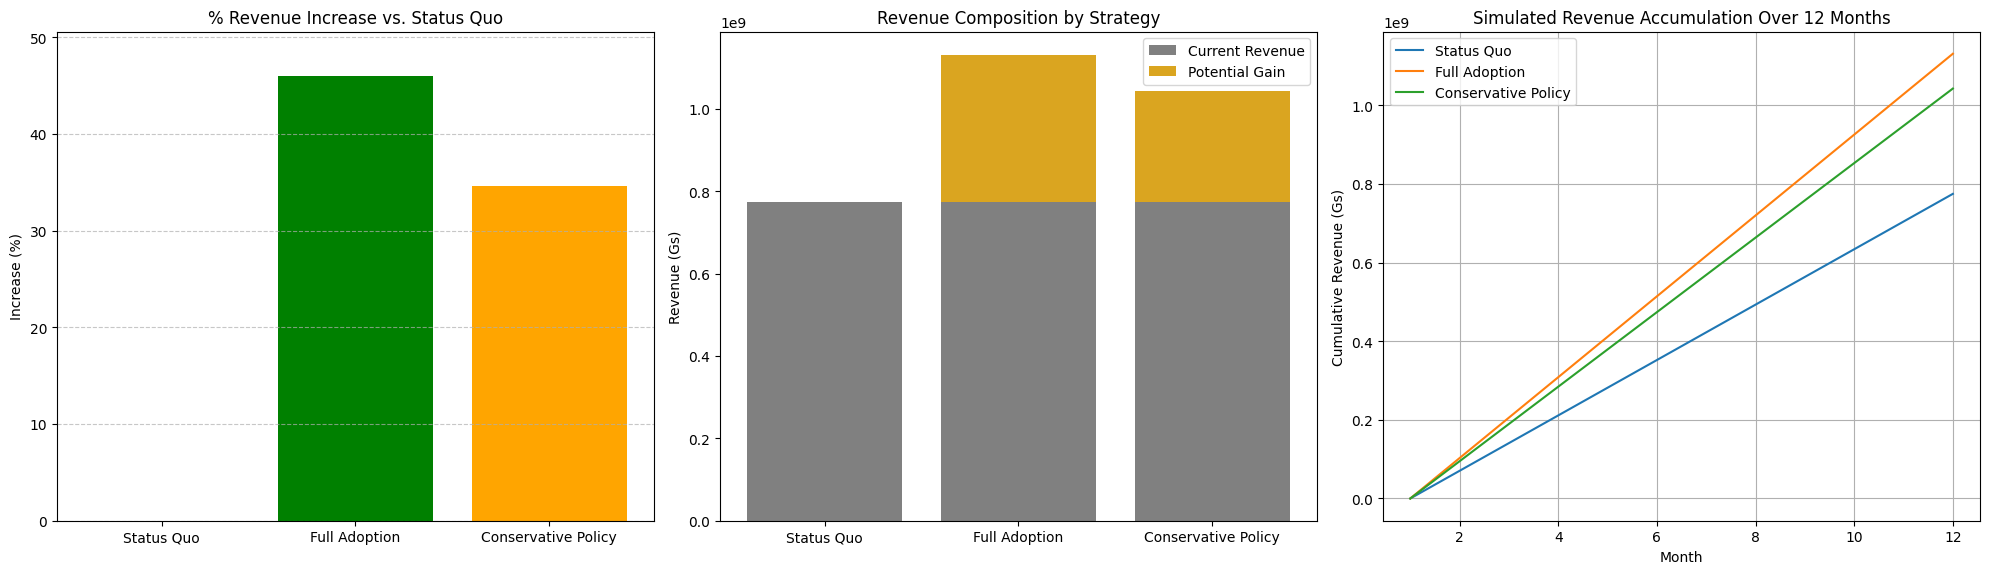

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Valores totales de ingresos en guaraníes
revenues_gs = {
    "Status Quo": revenue_status_quo,
    "Full Adoption": revenue_full_adoption,
    "Conservative Policy": revenue_conservative,
}

# Calcular aumentos porcentuales vs Status Quo
base = revenues_gs["Status Quo"]
percent_increase = {k: ((v - base) / base) * 100 if k != "Status Quo" else 0 for k, v in revenues_gs.items()}

# Calcular ganancias potenciales para stacked bar
potential_gain = {k: v - base if k != "Status Quo" else 0 for k, v in revenues_gs.items()}

# Simulación de ingresos acumulados lineales en 12 meses
months = np.arange(1, 13)
monthly_revenue = {k: np.linspace(0, v, 12) for k, v in revenues_gs.items()}

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Gráfico 1: % aumento ingresos
axs[0].bar(percent_increase.keys(), percent_increase.values(), color=['gray', 'green', 'orange'])
axs[0].set_title("% Revenue Increase vs. Status Quo")
axs[0].set_ylabel("Increase (%)")
axs[0].set_ylim(0, max(percent_increase.values()) * 1.1)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2: Composición de ingresos
axs[1].bar(potential_gain.keys(), [base]*3, label="Current Revenue", color='gray')
axs[1].bar(potential_gain.keys(), potential_gain.values(), bottom=[base]*3, label="Potential Gain", color='goldenrod')
axs[1].set_title("Revenue Composition by Strategy")
axs[1].set_ylabel("Revenue (Gs)")
axs[1].legend()

# Gráfico 3: Acumulación ingresos en 12 meses
for k, v in monthly_revenue.items():
    axs[2].plot(months, v, label=k)
axs[2].set_title("Simulated Revenue Accumulation Over 12 Months")
axs[2].set_xlabel("Month")
axs[2].set_ylabel("Cumulative Revenue (Gs)")
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


# Final Simulation: Revenue Lift vs. Status Quo 💼📊

## Objective:
Demonstrate the financial opportunity of price optimization by simulating total revenue under three pricing strategies:

- **Status Quo:** Keep current premiums as-is.
- **Full Adoption:** Apply suggested premiums to all underpriced clients.
- **Conservative Policy:** Adjust premiums only when:
  - Actual Premium < 70% of Suggested Premium
  - Increase capped at 90% of Max Tolerated Premium

## Key Insights:

- 📈 **Full Adoption** leads to a revenue increase of approximately **46%** over the status quo.
- ⚖️ **Conservative Policy**—more cautious—still delivers a **35% uplift**.
- 💡 Over a 12-month horizon, this translates into hundreds of millions of Guaraníes in potential additional revenue.
  
## Strategic Recommendations:

- Even modest implementation of the suggested pricing could unlock significant hidden value, with minimal risk of losing customers if adjustments are kept within tolerated ranges.
- Prioritize client communication and gradual pricing adjustments to maintain client satisfaction.
  
## Final Business Conclusion: 💰 Estimated Financial Opportunity

| Scenario            | Total Revenue (Gs) | Total Revenue (USD) | Increase vs. Status Quo |
|---------------------|-------------------:|--------------------:|------------------------:|
| Status Quo          |       774,959,014  |            $139,041  |                       – |
| Full Adoption       |     1,131,386,624  |            $202,990  |                   +46%  |
| Conservative Policy |     1,042,813,834  |            $187,099  |                   +35%  |
               |

---

### This demonstrates that:

- Underpricing remains a key source of lost income but at a realistic scale.
- Data-driven pricing adjustments can improve profitability measurably and sustainably.
- Revenue gains are achievable with limited operational disruption.

---


#  **Disclaimer:**  
> The results and figures presented in this notebook are based on **hypothetical and simulated data**. The monetary values, including premiums, losses, and potential gains, are **not real** and are only meant to illustrate the power of data analysis in the insurance industry.  
>
> This simulation applies to a **generalized model of a national insurance system**, and does **not represent the performance or financials of any specific insurance company**.  
>
> The purpose of this analysis is to demonstrate how **data-driven pricing strategies** can reveal hidden revenue opportunities and guide more informed business decisions.
